### 📺Netflix :: 🥤Visualization, 🎬Recommendation, 🍟EDA
Netflix is one of the most famous streaming platform and that keeps growing bigger and faster with its popularity, showa and quality content. This notebook is all about an EDA or stroy telling through its data along with a content-based recommendation system and a wide range of different graphs and visuals and Predicting movie Type by using Different Machine Learning Techniques and Different Algorithms

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder,StandardScaler,minmax_scale
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('netflix1.csv')

In [4]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## Data Preprocessing --->

Shape of the data set

In [5]:
shape  = df.shape
print(f"No of the rows :{shape[0]}")
print(f"No of the columns :{shape[1]}")

No of the rows :8790
No of the columns :10


Checking the appropriate data types :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


Here we can see that the Date Added column has object we can change the data type to Date data type :

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [8]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

Hence Date_addes columns has changed to datetime data type

### Checking null and missing values -->

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Hence there are no null and missing values 

### Checking Data Inconsitency :

In [10]:
df['show_id'].value_counts()

show_id
s1       1
s7990    1
s7982    1
s7984    1
s7986    1
        ..
s3960    1
s3958    1
s3956    1
s3955    1
s8786    1
Name: count, Length: 8790, dtype: int64

In [11]:
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [12]:
for i in df['title'].unique():
    print(i)

Dick Johnson Is Dead
Ganglands
Midnight Mass
Confessions of an Invisible Girl
Sankofa
The Great British Baking Show
The Starling
Motu Patlu in the Game of Zones
Je Suis Karl
Motu Patlu in Wonderland
Motu Patlu: Deep Sea Adventure
Motu Patlu: Mission Moon
99 Songs (Tamil)
Bridgerton - The Afterparty
Bling Empire - The Afterparty
Cobra Kai - The Afterparty
The Circle - The Afterparty
Jailbirds New Orleans
Crime Stories: India Detectives
True: Winter Wishes
True: Magical Friends
True: Wonderful Wishes
Dance & Sing with True
My Little Pony: A New Generation
Bangkok Breaking
Europe's Most Dangerous Man: Otto Skorzeny in Spain
Samudri Lootere
Monsters Inside: The 24 Faces of Billy Milligan
Go! Go! Cory Carson: Chrissy Takes the Wheel
Jeans
Grown Ups
Dark Skies
Paranoia
Jaguar
Chicago Party Aunt
Squid Game
Tayo and Little Wizards
The World's Most Amazing Vacation Rentals
Metal Shop Masters
Pokémon Master Journeys: The Series
Titipo Titipo
Mighty Raju
Tobot Galaxy Detectives
Hotel Del Luna
Bra

In [13]:
for v in df['director'].unique():
    print(v)

Kirsten Johnson
Julien Leclercq
Mike Flanagan
Bruno Garotti
Haile Gerima
Andy Devonshire
Theodore Melfi
Suhas Kadav
Christian Schwochow
Not Given
Krysia Plonka, Kristian Mercado
Mark Thornton, Todd Kauffman
Robert Cullen, José Luis Ucha
Kongkiat Komesiri
Pedro de Echave García, Pablo Azorín Williams
Anirban Majumder
Olivier Megaton
Alex Woo, Stanley Moore
S. Shankar
Dennis Dugan
Scott Stewart
Robert Luketic
Rajiv Menon
Adam Salky
K.S. Ravikumar
Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket Chaudhary
Daniel Sandu
Cédric Jimenez
George Nolfi
Bunmi Ajakaiye
Ben Simms
Steven Spielberg
Jeannot Szwarc
Joe Alves
Joseph Sargent
Daniel Espinosa
Antoine Fuqua
Toshiya Shinohara
Tyler Greco
Masahiko Murata
Hajime Kamegaki
Hirotsugu Kawasaki
Toshiyuki Tsuru
Tensai Okamura
Kemi Adetiba
Cedric Nicolas-Troyan
JJC Skillz, Funke Akindele
Thomas Sieben
Alice Waddington
Mona Achache, Patricia Tourancheau
Raja Gosnell
Fredrick Munk
Prakash Satam
Tomer Eshed
Delhiprasad Deenadayalan
Marcus Clarke
Alexis Alms

In [14]:
for c in df['country'].unique():
    print(c)

United States
France
Brazil
United Kingdom
India
Germany
Pakistan
Not Given
China
South Africa
Japan
Nigeria
Spain
Philippines
Australia
Argentina
Canada
Hong Kong
Italy
New Zealand
Egypt
Colombia
Mexico
Belgium
Switzerland
Taiwan
Bulgaria
Poland
South Korea
Saudi Arabia
Thailand
Indonesia
Kuwait
Malaysia
Vietnam
Lebanon
Romania
Syria
United Arab Emirates
Sweden
Mauritius
Austria
Turkey
Czech Republic
Cameroon
Netherlands
Ireland
Russia
Kenya
Chile
Uruguay
Bangladesh
Portugal
Hungary
Norway
Singapore
Iceland
Serbia
Namibia
Peru
Mozambique
Ghana
Zimbabwe
Israel
Finland
Denmark
Paraguay
Cambodia
Georgia
Soviet Union
Greece
West Germany
Iran
Venezuela
Slovenia
Guatemala
Jamaica
Somalia
Croatia
Jordan
Luxembourg
Senegal
Belarus
Puerto Rico
Cyprus
Ukraine


In [15]:
for d in df['date_added'].unique():
    print(d)

2021-09-25 00:00:00
2021-09-24 00:00:00
2021-09-22 00:00:00
2021-05-01 00:00:00
2021-09-23 00:00:00
2021-05-21 00:00:00
2021-07-13 00:00:00
2021-06-12 00:00:00
2021-05-07 00:00:00
2019-11-26 00:00:00
2018-06-15 00:00:00
2018-05-18 00:00:00
2019-06-18 00:00:00
2021-09-21 00:00:00
2021-09-20 00:00:00
2021-09-19 00:00:00
2021-09-17 00:00:00
2021-09-14 00:00:00
2021-09-10 00:00:00
2021-09-09 00:00:00
2021-09-07 00:00:00
2021-09-02 00:00:00
2021-09-01 00:00:00
2021-08-28 00:00:00
2021-08-29 00:00:00
2021-09-16 00:00:00
2021-04-07 00:00:00
2021-08-27 00:00:00
2021-09-15 00:00:00
2021-07-07 00:00:00
2021-08-25 00:00:00
2021-08-20 00:00:00
2021-08-18 00:00:00
2021-08-04 00:00:00
2021-08-03 00:00:00
2021-08-01 00:00:00
2021-07-30 00:00:00
2021-07-29 00:00:00
2021-07-28 00:00:00
2021-07-23 00:00:00
2021-07-09 00:00:00
2021-07-22 00:00:00
2021-07-21 00:00:00
2021-09-08 00:00:00
2021-04-14 00:00:00
2021-07-20 00:00:00
2021-07-14 00:00:00
2021-07-08 00:00:00
2021-07-02 00:00:00
2021-07-01 00:00:00


In [16]:
for r in df['release_year'].unique():
    print(r)

2020
2021
1993
2019
2013
2014
2018
1998
2010
2017
1997
1996
1975
1978
1983
1987
2012
2001
2002
2003
2004
2011
2008
2009
2007
2005
2006
2016
1994
2015
1982
1989
1990
1991
1999
1986
1984
1980
1961
2000
1995
1985
1925
1992
1976
1959
1988
1981
1972
1964
1954
1979
1958
1956
1963
1970
1973
1960
1974
1966
1971
1962
1969
1977
1967
1968
1965
1945
1946
1942
1955
1944
1947
1943


In [17]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [18]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [19]:
for d in df['duration'].unique():
    print(d)

90 min
1 Season
91 min
125 min
9 Seasons
104 min
87 min
127 min
76 min
71 min
131 min
39 min
36 min
34 min
35 min
46 min
67 min
65 min
61 min
166 min
103 min
97 min
106 min
2 Seasons
4 Seasons
147 min
94 min
161 min
111 min
110 min
105 min
96 min
124 min
116 min
98 min
115 min
122 min
55 min
99 min
88 min
100 min
6 Seasons
3 Seasons
23 min
102 min
93 min
95 min
85 min
83 min
182 min
5 Seasons
92 min
84 min
48 min
145 min
119 min
80 min
128 min
143 min
273 min
117 min
114 min
118 min
108 min
37 min
121 min
63 min
142 min
113 min
154 min
120 min
82 min
109 min
101 min
86 min
77 min
229 min
15 min
89 min
156 min
112 min
107 min
129 min
44 min
68 min
135 min
136 min
165 min
150 min
133 min
47 min
70 min
56 min
58 min
78 min
140 min
64 min
59 min
60 min
69 min
19 min
22 min
148 min
189 min
54 min
141 min
130 min
81 min
7 Seasons
138 min
132 min
8 Seasons
123 min
66 min
62 min
74 min
38 min
13 min
139 min
126 min
155 min
159 min
12 min
137 min
49 min
72 min
204 min
25 min
212 min
73 min
149 

In [20]:
for l in df['listed_in'].unique():
    print(l)

Documentaries
Crime TV Shows, International TV Shows, TV Action & Adventure
TV Dramas, TV Horror, TV Mysteries
Children & Family Movies, Comedies
Dramas, Independent Movies, International Movies
British TV Shows, Reality TV
Comedies, Dramas
Children & Family Movies, Comedies, Music & Musicals
Dramas, International Movies
Children & Family Movies, Music & Musicals
Dramas, International Movies, Music & Musicals
Movies
Comedies
Docuseries, Reality TV
British TV Shows, Crime TV Shows, Docuseries
Children & Family Movies
Kids' TV
Documentaries, International Movies
Crime TV Shows, Docuseries, International TV Shows
Comedies, International Movies, Romantic Movies
Horror Movies, Sci-Fi & Fantasy
Thrillers
International TV Shows, Spanish-Language TV Shows, TV Action & Adventure
TV Comedies
International TV Shows, TV Dramas, TV Thrillers
Reality TV
Anime Series, Kids' TV
Kids' TV, Korean TV Shows
International TV Shows, Romantic TV Shows, TV Comedies
International TV Shows, TV Action & Adventur

#### Hence All columns are consistence and accurate values

### Feture Engineering :

In [21]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


#### Adding a new fetures column named num_generes which splits the genres string by , and counts the number of elements.:

In [22]:
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(', ')))

In [23]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,num_genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,1
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",3
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",3
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",3


##### Adding a new feture column named duration_minutes which removes the ' min' text and converts the remaining string :

In [24]:
df['duration_minutues'] = df['duration'].str.replace(' min','')

In [25]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,num_genres,duration_minutues
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,1,90
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",3,1 Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",3,1 Season
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",3,125


##### Adding a new feture column named year added extracting a year from date added column  :

In [26]:
df['Year_Added_To_Netflix'] = df['date_added'].dt.year

Adding a seperate column season_info this column contains only season 1 , 2 , 3 remaining minutes NAN :

In [27]:
df['seasons'] = df['duration'].str.contains('Season', case=False, na=False)
df['season_info'] = df['duration'].where(df['seasons'])
df['duration'] = df['duration'].where(~df['seasons'])

Droping the helper columns seasons :

In [28]:
df.drop(columns=['seasons'],inplace=True)

#### Checking Duplicates

In [29]:
df.duplicated().sum()

0

Hence there are no duplicate found on the data set 

## Exploratory Data Analysis (EDA) :

In [30]:
df.describe(include='all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,num_genres,duration_minutues,Year_Added_To_Netflix,season_info
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,6126,8790,8790.000000,8790,8790.000000,2664
unique,8790,2,8787,4528,86,NaN,NaN,14,205,513,NaN,220,NaN,15
top,s1,Movie,9-Feb,Not Given,United States,NaN,NaN,TV-MA,90 min,"Dramas, International Movies",NaN,1 Season,NaN,1 Season
freq,1,6126,2,2588,3240,NaN,NaN,3205,152,362,NaN,1791,NaN,1791
mean,NaN,NaN,NaN,NaN,NaN,2019-05-17 21:44:01.638225408,2014.183163,NaN,NaN,NaN,2.194994,NaN,2018.873606,NaN
min,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,NaN,NaN,1.000000,NaN,2008.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2018-04-06 00:00:00,2013.000000,NaN,NaN,NaN,2.000000,NaN,2018.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,2019-07-03 00:00:00,2017.000000,NaN,NaN,NaN,2.000000,NaN,2019.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,2020-08-19 18:00:00,2019.000000,NaN,NaN,NaN,3.000000,NaN,2020.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN,3.000000,NaN,2021.000000,NaN


In [31]:
num  = df.select_dtypes(exclude=object)

##### Checking Correlation of numerical columns

In [32]:
corr_met = num.corr()
corr_met

,date_added,release_year,num_genres,Year_Added_To_Netflix
date_added,1.000000,0.108206,0.049063,0.983093
release_year,0.108206,1.000000,-0.040906,0.111624
num_genres,0.049063,-0.040906,1.000000,0.048195
Year_Added_To_Netflix,0.983093,0.111624,0.048195,1.000000


#### Corrlation with Heatmap

<Axes: >

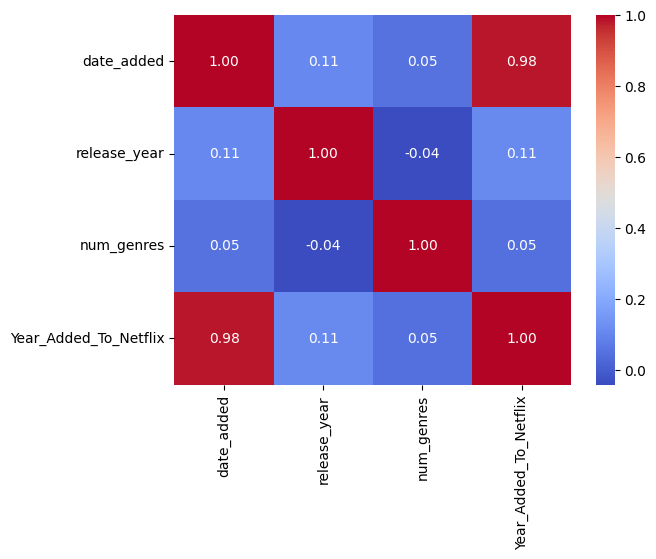

In [33]:
sns.heatmap(corr_met,annot=True, fmt=".2f", cmap='coolwarm')

#### Extracting the cleaned data to csv file ---->

In [34]:
df.to_csv('Cleaned_Netflix.csv',index=False)

In [35]:
df.shape

(8790, 14)

In [36]:
df.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,num_genres,duration_minutues,Year_Added_To_Netflix,season_info
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,NaN,"International TV Shows, TV Dramas",2,2 Seasons,2017,2 Seasons
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,NaN,Kids' TV,1,3 Seasons,2018,3 Seasons
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,NaN,"International TV Shows, Romantic TV Shows, TV ...",3,1 Season,2016,1 Season
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,NaN,Kids' TV,1,1 Season,2018,1 Season
8789,s8786,TV Show,YOM,Not Given,Pakistan,2018-06-07,2016,TV-Y7,NaN,Kids' TV,1,1 Season,2018,1 Season


### Dealing with Skewed Data --->

#### Hence Dataset is perfectly normally distributed because there are not such numerical columns to check the skewness of the data 

In [37]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,num_genres,duration_minutues,Year_Added_To_Netflix,season_info
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,1,90,2021,NaN
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",3,1 Season,2021,1 Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,NaN,"TV Dramas, TV Horror, TV Mysteries",3,1 Season,2021,1 Season
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2,91,2021,NaN
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",3,125,2021,NaN


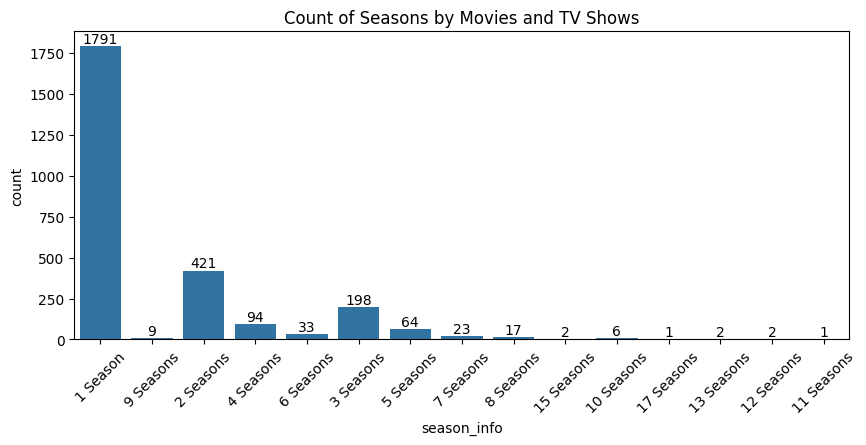

In [38]:
plt.figure(figsize=(10,4))
# count_data = df['season_info'].value_counts().reset_index()
# count_data.columns = ['season_info', 'count']

# count_data = count_data.sort_values(by='count', ascending=False)

season_count = sns.countplot(data=df,x=df['season_info'])
plt.title('Count of Seasons by Movies and TV Shows')
plt.xticks(rotation=45)

for cols in season_count.containers:
    season_count.bar_label(cols)
    
plt.show()


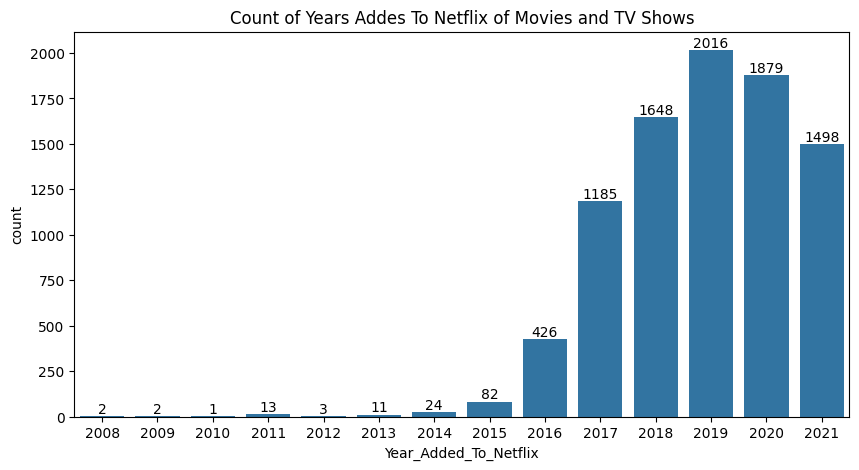

In [39]:
plt.figure(figsize=(10,5))
count_yatn = sns.countplot(data=df,x=df['Year_Added_To_Netflix'])
plt.title('Count of Years Addes To Netflix of Movies and TV Shows')

for col in count_yatn.containers:
    count_yatn.bar_label(col)

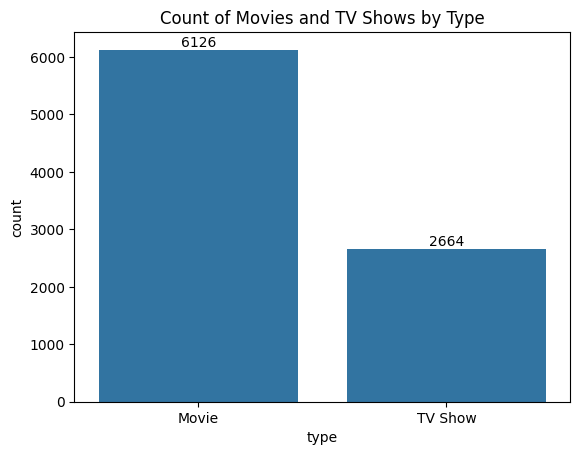

In [40]:
count_type = sns.countplot(data=df,x='type')
plt.title('Count of Movies and TV Shows by Type')

for col in count_type.containers:
    count_type.bar_label(col)

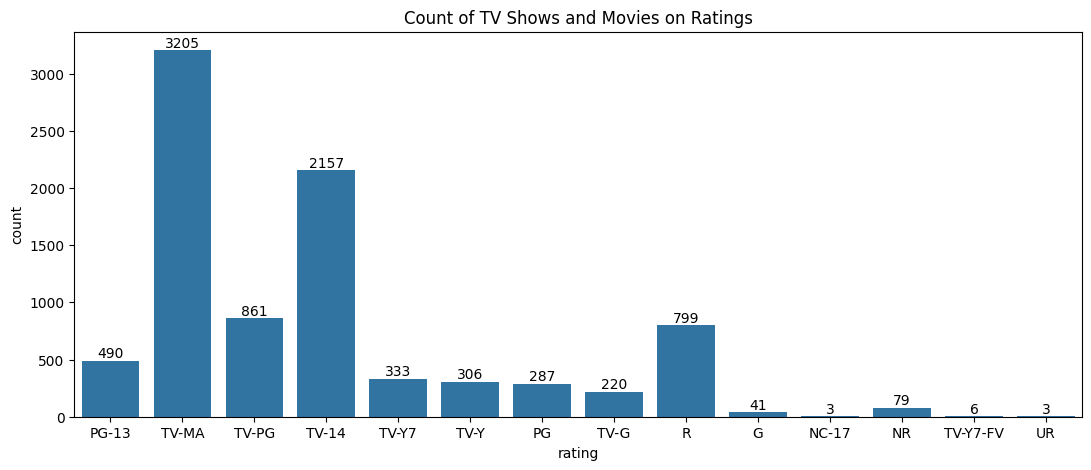

In [41]:
plt.figure(figsize=(13,5))
plt.title('Count of TV Shows and Movies on Ratings')
count_rat = sns.countplot(data=df,x='rating')

for col in count_rat.containers:
    count_rat.bar_label(col)

## Machine Learning Algorithms :

In [42]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'num_genres',
       'duration_minutues', 'Year_Added_To_Netflix', 'season_info'],
      dtype='object')

In X variable we store the all features and in y varibal we store the target column is "type"

In [43]:
X = df.drop(columns=['type'])
y = df['type']

In [44]:
X.columns

Index(['show_id', 'title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'num_genres', 'duration_minutues',
       'Year_Added_To_Netflix', 'season_info'],
      dtype='object')

In [45]:
y.head()

0      Movie
1    TV Show
2    TV Show
3      Movie
4      Movie
Name: type, dtype: object

sperating the catogorical columns to encode them into numerical columns --->

In [46]:
cato = X.select_dtypes(include=object)
X.columns
cat = ['show_id', 'title', 'director', 'country', 'date_added', 'release_year','rating', 'duration', 'listed_in', 'num_genres', 'duration_minutues','Year_Added_To_Netflix', 'season_info']

80% training 20% testing by train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

Feture encoding and algorithms are done by Pipline with ColumnTranformer

### RandomForestClassifier :

In [48]:
Preproccessing =ColumnTransformer([
    ('onehot',OneHotEncoder(handle_unknown='ignore'),cat)
])

model = Pipeline([
    ('Preproccessor',Preproccessing),
    ('Logistic',RandomForestClassifier(n_estimators=100, random_state=0))
])

In [49]:
model.fit(x_train,y_train)

Pipeline(steps=[('Preproccessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['show_id', 'title',
                                                   'director', 'country',
                                                   'date_added', 'release_year',
                                                   'rating', 'duration',
                                                   'listed_in', 'num_genres',
                                                   'duration_minutues',
                                                   'Year_Added_To_Netflix',
                                                   'season_info'])])),
                ('Logistic', RandomForestClassifier(random_state=0))])

Machine Predicted Values :

In [50]:
y_predict = model.predict(x_test)

Actual Values :

In [51]:
y_test.head()

521       Movie
884       Movie
6611    TV Show
2657      Movie
1700      Movie
Name: type, dtype: object

In [73]:
# Actual vs Predicted
df_ap = pd.DataFrame({'Actul Values':y_test,'Predicted':y_predict})
df_ap.head()

,Actul Values,Predicted
521,Movie,Movie
884,Movie,Movie
6611,TV Show,TV Show
2657,Movie,Movie
1700,Movie,Movie


In [52]:
acc = accuracy_score(y_test,y_predict)*100
print(f"Accuracy Percentage of the RandomForestClassifier on the test set : {acc}%")

Accuracy Percentage of the RandomForestClassifier on the test set : 100.0%


### LogisticRegression :

In [53]:
preprocessing2 = ColumnTransformer(
    transformers=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'),cat)
],
remainder='passthrough'
)

model2 = Pipeline([
    ('preprocessig',preprocessing2),
    ('Logistic',LogisticRegression())
])

In [54]:
model2.fit(x_train,y_train)

Pipeline(steps=[('preprocessig',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['show_id', 'title',
                                                   'director', 'country',
                                                   'date_added', 'release_year',
                                                   'rating', 'duration',
                                                   'listed_in', 'num_genres',
                                                   'duration_minutues',
                                                   'Year_Added_To_Netflix',
                                                   'season_info'])])),
                ('Logistic', LogisticRegression())])

In [55]:
y_predict2 = model2.predict(x_test)

In [56]:
accuracy_score(y_test,y_predict2)*100
print(f"Accuracy Percentage of the LogisticRegression on the test set : {acc}%")

Accuracy Percentage of the LogisticRegression on the test set : 100.0%


### DecisionTreeClassifier :

In [57]:
preprocessing3 = ColumnTransformer(
    transformers=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'),cat)
],
remainder='passthrough'
)

model3 = Pipeline([
    ('preprocessig',preprocessing3),
    ('Logistic',DecisionTreeClassifier())
])

In [58]:
model3.fit(x_train,y_train)

Pipeline(steps=[('preprocessig',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['show_id', 'title',
                                                   'director', 'country',
                                                   'date_added', 'release_year',
                                                   'rating', 'duration',
                                                   'listed_in', 'num_genres',
                                                   'duration_minutues',
                                                   'Year_Added_To_Netflix',
                                                   'season_info'])])),
                ('Logistic', DecisionTreeClassifier())])

In [59]:
y_predict3 = model3.predict(x_test)

In [60]:
accuracy_score(y_test,y_predict3)*100
print(f"Accuracy Percentage of the DecisionTreeClassifier on the test set : {acc}%")

Accuracy Percentage of the DecisionTreeClassifier on the test set : 100.0%


### Conclusion :

#### RandomForestClassifier accuarcy score is 100% 
#### LogisticRegression accuracy_score is 100%
#### DecisionTreeClassifier accuracy_score is 100%

finally our prediction score is 100% results

### Gradio Appliction for Algorithms Prediction :

In [61]:
import gradio as gr

In [62]:
X.columns

Index(['show_id', 'title', 'director', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'num_genres', 'duration_minutues',
       'Year_Added_To_Netflix', 'season_info'],
      dtype='object')

In [63]:
unique_ids = df['show_id'].unique().tolist()
unique_type = df['type'].unique().tolist()
unique_title = df['title'].unique().tolist()
unique_dire = df['director'].unique().tolist()
unique_country = df['country'].unique().tolist()
unique_dates = df['date_added'].dt.strftime('%Y-%m-%d').unique().tolist()
unique_rely = df['release_year'].unique().tolist()
unique_rating = df['rating'].unique().tolist()
unique_duration = df['duration'].unique().tolist()
unique_listedin = df['listed_in'].unique().tolist()
unique_durm = df['duration_minutues'].unique().tolist()
unique_yatn = df['Year_Added_To_Netflix'].unique().tolist()

In [64]:
def prediction(show_id, title, director, country, date_added, release_year,rating, duration, listed_in, num_genres, duration_minutues,Year_Added_To_Netflix, season_info):
    inputs = pd.DataFrame([[show_id, title, director, country, date_added, release_year,rating, duration, listed_in, num_genres, duration_minutues,Year_Added_To_Netflix, season_info]],columns=["show_id", "title", "director", "country", "date_added", "release_year","rating", "duration", "listed_in", "num_genres", "duration_minutues","Year_Added_To_Netflix", "season_info"]) 
    return model.predict(inputs)[0]


In [65]:
demo = gr.Interface(
    fn = prediction,
    inputs = [
        gr.Dropdown(choices=unique_ids,label='Show ID'),
        gr.Dropdown(choices=unique_type,label='Type'),
        gr.Dropdown(choices=unique_title,label='Title'),
        gr.Dropdown(choices=unique_dire,label='Directors'),
        gr.Dropdown(choices=unique_country,label='Country'),
        gr.Dropdown(choices=unique_dates,label='Date Added'),
        gr.Dropdown(choices=unique_rating,label='Rating'),
        gr.Dropdown(choices=unique_duration,label='Duration'),
        gr.Dropdown(choices=unique_listedin,label='Listed In'),
        gr.Dropdown(choices=unique_durm,label='Duration in Minutes'),
        gr.Dropdown(choices='number',label='Year Added To Netflix 2008 - 2020')
    ],
    outputs=gr.Textbox(label='Predicted Movie OR TV Show'),
    title="Predicting Movie OR TV Show on the basis of following information"
)

In [66]:
demo.launch(share=True)
# demo.close()

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://ed63f17bfc85f3384c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
